In [1]:
from celonis_connect import Celonis_Connect
cn = Celonis_Connect()

/Users/baichaoye/opt/anaconda3/envs/lab/lib/python3.9/site-packages/pm4py/util/lp/variants/scipy_solver.py:20: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  from scipy.optimize.optimize import OptimizeResult


[2022-07-02 19:26:20] INFO: Initial connect successful! Hello Baichao. PyCelonis Version: 1.7.1


/Users/baichaoye/opt/anaconda3/envs/lab/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 1.7.1#sha256=1a33bea4a3fe5bf28b39faa561448594f768b243c3260800b7bddf5b80b46d2e is an invalid version and will not be supported in a future release
  warnings.warn(
/Users/baichaoye/opt/anaconda3/envs/lab/lib/python3.9/site-packages/pkg_resources/_vendor/packaging/version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


In [52]:
cn.get_pools().find('lab').datamodels

[
<Datamodel, id 02654e7f-c480-4bc9-b014-5539bee182ec, name synthetic>,
<Datamodel, id 0c6b4617-c643-42b5-8377-e99c974e65bb, name rum_example>,
<Datamodel, id 1914c64d-c9be-42b9-8cda-3b9b2eb8fb41, name test>,
<Datamodel, id 1d217e7f-f86d-457d-811d-0b0b8ae08e20, name BPIC15>,
]

In [53]:
cn.set_datamodel('synthetic')

In [154]:
datamodel = cn.get_datamodel()
#  synthetic_event_log_xes
datamodel
table = "synthetic_event_log_xes"

variant table

In [218]:
from pycelonis.celonis_api.pql.pql import PQL, PQLColumn,PQLFilter

def variant_table(datamodel,table:str):
    ## table for variant table
    pql = PQL()
    pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name"  )'))
    pql.add(PQLColumn(name='freq',query = 'COUNT("' + table + '_CASES"."Case ID")'))
    
    pql.add(PQLColumn(name = 'variant_id', query='MIN("' + table + '_CASES"."Case ID")' ))
    df = datamodel.get_data_frame(pql)
    
    ## for activities
    pql = PQL()
    pql.add(
        PQLColumn(name="activities", query='"' + table + '"."concept:name"')
    )
    pql.add(
        PQLColumn(name="frequency", query='COUNT_TABLE("' + table + '")')
    )

    
    activities = sorted(datamodel.get_data_frame(pql)["activities"].tolist())
    activities = set(activities)

    return df,activities

In [219]:
variant_df,activities = variant_table(datamodel,table="synthetic_event_log_xes")

[2022-07-02 23:52:34] INFO: PQL Export started...
[2022-07-02 23:52:34] INFO: PQL Export status: DONE
[2022-07-02 23:52:35] INFO: PQL Export started...
[2022-07-02 23:52:35] INFO: PQL Export status: DONE


In [139]:
activities

{'a', 'b', 'c', 'd', 'e', 'f', 'x'}

In [355]:
'a' in list(activities)

True

In [238]:
variant_df
# variant_dic = {variant_df}
variant_df.groupby('variant')['freq'].apply(int).to_dict() 

{'a, b, c, d': 45,
 'a, b, c, d, e, f': 40,
 'a, b, c, d, f': 200,
 'a, b, c, e, f': 200,
 'a, b, c, f': 30,
 'a, b, c, x, e, f': 100,
 'a, c, b, d, f': 200,
 'a, c, b, e, f': 200,
 'a, c, d, f': 50,
 'c, b, d, f': 35}

In [244]:
select_id = str("','".join(variant_df['variant_id'].tolist()))
print(select_id)
pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))
pql.add(PQLColumn(name = "id",query = '"'+table+'"."Case Id"'))
# pql.add(PQLColumn(name = "act",query = '"'+table+'"."concept:name"'))
df = datamodel.get_data_frame(pql)
df

00d9a426-3496-43dc-be2d-069b04490b0d','00b06e7d-2c16-4808-a003-e690cdd173db','0040cb14-bbf7-4fc7-a345-b8c79aebf87c','0131bf9c-e7f4-45ac-8435-a07eee9f69ba','0653126e-3746-479f-821f-c7ffa28f968c','006825a4-f9e8-4a92-8343-b0e593210c7b','01b925fc-7b55-4e18-ad36-e8f1c0242608','01e84bd3-a6e0-40ab-b478-35271c007cd2','03027514-4850-4fcc-836b-d6ded96f7604','07ac2832-a4e5-4ce7-a3ea-eb3341b86a79
[2022-07-03 01:02:57] INFO: PQL Export started...
[2022-07-03 01:02:58] INFO: PQL Export status: DONE


,id
0,0040cb14-bbf7-4fc7-a345-b8c79aebf87c
1,0040cb14-bbf7-4fc7-a345-b8c79aebf87c
2,0040cb14-bbf7-4fc7-a345-b8c79aebf87c
3,0040cb14-bbf7-4fc7-a345-b8c79aebf87c
4,0040cb14-bbf7-4fc7-a345-b8c79aebf87c
5,006825a4-f9e8-4a92-8343-b0e593210c7b
6,006825a4-f9e8-4a92-8343-b0e593210c7b
7,006825a4-f9e8-4a92-8343-b0e593210c7b
8,006825a4-f9e8-4a92-8343-b0e593210c7b
9,006825a4-f9e8-4a92-8343-b0e593210c7b


In [245]:
select_id

"00d9a426-3496-43dc-be2d-069b04490b0d','00b06e7d-2c16-4808-a003-e690cdd173db','0040cb14-bbf7-4fc7-a345-b8c79aebf87c','0131bf9c-e7f4-45ac-8435-a07eee9f69ba','0653126e-3746-479f-821f-c7ffa28f968c','006825a4-f9e8-4a92-8343-b0e593210c7b','01b925fc-7b55-4e18-ad36-e8f1c0242608','01e84bd3-a6e0-40ab-b478-35271c007cd2','03027514-4850-4fcc-836b-d6ded96f7604','07ac2832-a4e5-4ce7-a3ea-eb3341b86a79"

ALWAYS AFTER

In [406]:


pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))

pql.add(PQLColumn(name = "id",query = '"'+table+'_CASES"."Case Id"'))
pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name" ) '))


def conformance_always_after(activities):

    activities = list(activities)
    a = str(activities[0])
    b = str(activities[1])
    
    
    return PQLColumn(
        name="always_after " + a + " TO " + b,
        query="CASE WHEN PROCESS NOT EQUALS '"
        + a
        + "' THEN 0 WHEN PROCESS EQUALS '"
        + a
        + "' TO ANY TO '"
        + b
        + "' THEN 1 ELSE -1 END"
    )

aa = model['always_after']
for con in aa:
    pql.add(conformance_always_after(con))

    
df = datamodel.get_data_frame(pql)
df
    

[2022-07-03 04:57:26] INFO: PQL Export started...
[2022-07-03 04:57:26] INFO: PQL Export status: DONE


,id,variant,always_after x TO f,always_after x TO e,always_after a TO c,always_after e TO f
0,0040cb14-bbf7-4fc7-a345-b8c79aebf87c,"a, b, c, d, f",0,0,1,0
1,006825a4-f9e8-4a92-8343-b0e593210c7b,"a, b, c, x, e, f",1,1,1,1
2,00b06e7d-2c16-4808-a003-e690cdd173db,"a, b, c, d, e, f",0,0,1,1
3,00d9a426-3496-43dc-be2d-069b04490b0d,"a, b, c, d",0,0,1,0
4,0131bf9c-e7f4-45ac-8435-a07eee9f69ba,"a, b, c, e, f",0,0,1,1
5,01b925fc-7b55-4e18-ad36-e8f1c0242608,"a, c, b, d, f",0,0,1,0
6,01e84bd3-a6e0-40ab-b478-35271c007cd2,"a, c, b, e, f",0,0,1,1
7,03027514-4850-4fcc-836b-d6ded96f7604,"a, c, d, f",0,0,1,0
8,0653126e-3746-479f-821f-c7ffa28f968c,"a, b, c, f",0,0,1,0
9,07ac2832-a4e5-4ce7-a3ea-eb3341b86a79,"c, b, d, f",0,0,0,0


ALWAYS BEFORE

In [315]:

pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))

pql.add(PQLColumn(name = "id",query = '"'+table+'_CASES"."Case Id"'))
pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name" ) '))


def conformance_always_before(activities):
    activities = list(activities)
    a = str(activities[0])
    b = str(activities[1])

    return PQLColumn(
        name="always_before " + a + " TO " + b,
        query="CASE WHEN PROCESS NOT EQUALS '"
              + a
              + "' THEN 0 WHEN PROCESS EQUALS '"
              + b
              + "' TO ANY TO '"
              + a
              + "' THEN 1 ELSE -1 END"
    )

aa = model['always_before']
for con in aa:
    pql.add(conformance_always_before(con))

    
df = datamodel.get_data_frame(pql)
df
    


[2022-07-03 02:13:13] INFO: PQL Export started...
[2022-07-03 02:13:13] INFO: PQL Export status: DONE


,id,variant,always_before f TO c,always_before e TO a,always_before e TO c,always_before e TO b,always_before x TO c,always_before d TO c,always_before x TO a,always_before x TO b
0,0040cb14-bbf7-4fc7-a345-b8c79aebf87c,"a, b, c, d, f",1,0,0,0,0,1,0,0
1,006825a4-f9e8-4a92-8343-b0e593210c7b,"a, b, c, x, e, f",1,1,1,1,1,0,1,1
2,00b06e7d-2c16-4808-a003-e690cdd173db,"a, b, c, d, e, f",1,1,1,1,0,1,0,0
3,00d9a426-3496-43dc-be2d-069b04490b0d,"a, b, c, d",0,0,0,0,0,1,0,0
4,0131bf9c-e7f4-45ac-8435-a07eee9f69ba,"a, b, c, e, f",1,1,1,1,0,0,0,0
5,01b925fc-7b55-4e18-ad36-e8f1c0242608,"a, c, b, d, f",1,0,0,0,0,1,0,0
6,01e84bd3-a6e0-40ab-b478-35271c007cd2,"a, c, b, e, f",1,1,1,1,0,0,0,0
7,03027514-4850-4fcc-836b-d6ded96f7604,"a, c, d, f",1,0,0,0,0,1,0,0
8,0653126e-3746-479f-821f-c7ffa28f968c,"a, b, c, f",1,0,0,0,0,0,0,0
9,07ac2832-a4e5-4ce7-a3ea-eb3341b86a79,"c, b, d, f",1,0,0,0,0,1,0,0


NEVER TOGETHER

In [310]:
print(model['never_together'])

{('x', 'd'), ('d', 'x')}


In [409]:

pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))

pql.add(PQLColumn(name = "id",query = '"'+table+'_CASES"."Case Id"'))
pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name" ) '))


def conformance_never_together(activities,table):
    activities = list(activities)
    a = str(activities[0])
    b = str(activities[1])
    query = (
        "CASE WHEN PROCESS NOT EQUALS '"
        + a
        + "'THEN 0 WHEN MATCH_ACTIVITIES(\""
        + table
        + '"."concept:name", NODE[\''
        + a
        + "'],EXCLUDING['"
        + b
        + "']) = 1 THEN 1 ELSE -1 END"
    )

    return PQLColumn(
        name="never_together " + a + " TO " + b,
        query=query
    )
    
    
aa = model["never_together"]
for con in aa:
    pql.add(conformance_never_together(con))

df = datamodel.get_data_frame(pql)
df

TypeError: conformance_never_together() missing 1 required positional argument: 'table'

DIRECTLY FOLLOW

In [335]:
model.keys()

dict_keys(['equivalence', 'always_after', 'always_before', 'never_together', 'directly_follows', 'activ_freq'])

In [340]:

pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))

pql.add(PQLColumn(name = "id",query = '"'+table+'_CASES"."Case Id"'))
pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name" ) '))


def conformance_directly_follow(activities):
    activities = list(activities)
    a = str(activities[0])
    b = str(activities[1])
    query = (
        "CASE WHEN PROCESS NOT EQUALS '"
        + a
        + "' THEN 0 WHEN PROCESS EQUALS '"
        + a
        + "' TO '"
        + b
        + "' THEN 1 ELSE -1 END"
    )
    return PQLColumn(name="directly_follow " + a + " TO " + b, query=query)


aa = model["directly_follows"]
for con in aa:
    pql.add(conformance_directly_follows(con))

df = datamodel.get_data_frame(pql)
df

[2022-07-03 02:48:00] INFO: PQL Export started...
[2022-07-03 02:48:01] INFO: PQL Export status: DONE


,id,variant,directly_follow x TO e,directly_follow e TO f
0,0040cb14-bbf7-4fc7-a345-b8c79aebf87c,"a, b, c, d, f",0,0
1,006825a4-f9e8-4a92-8343-b0e593210c7b,"a, b, c, x, e, f",1,1
2,00b06e7d-2c16-4808-a003-e690cdd173db,"a, b, c, d, e, f",0,1
3,00d9a426-3496-43dc-be2d-069b04490b0d,"a, b, c, d",0,0
4,0131bf9c-e7f4-45ac-8435-a07eee9f69ba,"a, b, c, e, f",0,1
5,01b925fc-7b55-4e18-ad36-e8f1c0242608,"a, c, b, d, f",0,0
6,01e84bd3-a6e0-40ab-b478-35271c007cd2,"a, c, b, e, f",0,1
7,03027514-4850-4fcc-836b-d6ded96f7604,"a, c, d, f",0,0
8,0653126e-3746-479f-821f-c7ffa28f968c,"a, b, c, f",0,0
9,07ac2832-a4e5-4ce7-a3ea-eb3341b86a79,"c, b, d, f",0,0


equivalence

In [346]:
model['equivalence']

{('a', 'c'),
 ('b', 'c'),
 ('d', 'c'),
 ('e', 'a'),
 ('e', 'b'),
 ('e', 'c'),
 ('e', 'f'),
 ('f', 'c'),
 ('x', 'a'),
 ('x', 'b'),
 ('x', 'c'),
 ('x', 'e'),
 ('x', 'f')}

In [352]:

pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))

pql.add(PQLColumn(name = "id",query = '"'+table+'_CASES"."Case Id"'))
pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name" ) '))
def conformance_equivalence(activities,table):
    activities = list(activities)
    a = str(activities[0])
    b = str(activities[1])
    
    def sum_query(a):
        return (
            'SUM( CASE WHEN "'
            + table
            + '"."concept:name" = \''
            + a
            + "' THEN 1 ELSE 0 END)"
        )
    query = (
        "CASE WHEN "
        + sum_query(a)
        + "  = 0 "
        + "THEN 0 WHEN "
        + sum_query(a)
        + " = "
        + sum_query(b)
        
        + "THEN 1 ELSE -1 END"
    )
    col_name = "equivalence " + a + " TO " + b
    return (PQLColumn(name= col_name, query=query))
    
aa = model["equivalence"]
for con in aa:
    pql.add(conformance_equivalence(con,table))

df = datamodel.get_data_frame(pql)
df 

[2022-07-03 03:17:03] INFO: PQL Export started...
[2022-07-03 03:17:05] INFO: PQL Export status: DONE


,id,variant,equivalence x TO e,equivalence f TO c,equivalence b TO c,equivalence e TO f,equivalence e TO a,equivalence e TO c,equivalence e TO b,equivalence x TO f,equivalence a TO c,equivalence x TO c,equivalence d TO c,equivalence x TO a,equivalence x TO b
0,0040cb14-bbf7-4fc7-a345-b8c79aebf87c,"a, b, c, d, f",0,1,1,0,0,0,0,0,1,0,1,0,0
1,006825a4-f9e8-4a92-8343-b0e593210c7b,"a, b, c, x, e, f",1,1,1,1,1,1,1,1,1,1,0,1,1
2,00b06e7d-2c16-4808-a003-e690cdd173db,"a, b, c, d, e, f",0,1,1,1,1,1,1,0,1,0,1,0,0
3,00d9a426-3496-43dc-be2d-069b04490b0d,"a, b, c, d",0,0,1,0,0,0,0,0,1,0,1,0,0
4,0131bf9c-e7f4-45ac-8435-a07eee9f69ba,"a, b, c, e, f",0,1,1,1,1,1,1,0,1,0,0,0,0
5,01b925fc-7b55-4e18-ad36-e8f1c0242608,"a, c, b, d, f",0,1,1,0,0,0,0,0,1,0,1,0,0
6,01e84bd3-a6e0-40ab-b478-35271c007cd2,"a, c, b, e, f",0,1,1,1,1,1,1,0,1,0,0,0,0
7,03027514-4850-4fcc-836b-d6ded96f7604,"a, c, d, f",0,1,0,0,0,0,0,0,1,0,1,0,0
8,0653126e-3746-479f-821f-c7ffa28f968c,"a, b, c, f",0,1,1,0,0,0,0,0,1,0,0,0,0
9,07ac2832-a4e5-4ce7-a3ea-eb3341b86a79,"c, b, d, f",0,1,1,0,0,0,0,0,0,0,1,0,0


frequency

In [358]:
"','".join(list(model['activ_freq'].keys()))

"a','b','c','e','f','d','x"

In [356]:
activities


{'a', 'b', 'c', 'd', 'e', 'f', 'x'}

In [399]:
pql = PQL()
pql.add(PQLFilter("FILTER DOMAIN \"synthetic_event_log_xes_CASES\".\"Case ID\" IN ( '"+ select_id +"' )"))

pql.add(PQLColumn(name = "id",query = '"'+table+'_CASES"."Case Id"'))
pql.add(PQLColumn(name='variant',query = 'VARIANT ( "'+table+'"."concept:name" ) '))

def conformance_frequency(activity,table):
    all_act_in_model ="('"+"','".join(list(activity.keys()))+"')"
    print(all_act_in_model)
    pql_list = []
    pql_list.append(PQLColumn(name='not_in_model',query = 'SUM(CASE WHEN ("' + table + '"."concept:name") in ' + all_act_in_model + "THEN 0 ELSE -1 END)"))
    for ac in activity.keys():
        calc_reworl = 'CALC_REWORK("'+table+'"."concept:name" IN (\''+ ac+'\'))'
        freq = "("+",".join(map(str,list(activity[ac])))+")"
        query = "CASE WHEN " + calc_reworl + "=0 AND 0 IN "+ freq +" THEN 0 WHEN "+ calc_reworl + ">0 AND "+ calc_reworl + " IN " + freq + "THEN 1 ELSE -1 END"
#         print(calc_reworl)
#         print(freq)
#         print(query)
        pql_list.append(PQLColumn(name = ac+"_"+freq,query=query))
    return pql_list


act = model['activ_freq'].copy()

# del act['b']
l = conformance_frequency(act,table)
for pqlc in l:
    pql += pqlc


df = datamodel.get_data_frame(pql)
df

('a','b','c','e','f','d','x')
[2022-07-03 04:46:53] INFO: PQL Export started...
[2022-07-03 04:46:54] INFO: PQL Export status: DONE


,id,variant,not_in_model,"a_(0,1)","b_(0,1)",c_(1),"e_(0,1)","f_(0,1)","d_(0,1)","x_(0,1)"
0,0040cb14-bbf7-4fc7-a345-b8c79aebf87c,"a, b, c, d, f",0,1,1,1,0,1,1,0
1,006825a4-f9e8-4a92-8343-b0e593210c7b,"a, b, c, x, e, f",0,1,1,1,1,1,0,1
2,00b06e7d-2c16-4808-a003-e690cdd173db,"a, b, c, d, e, f",0,1,1,1,1,1,1,0
3,00d9a426-3496-43dc-be2d-069b04490b0d,"a, b, c, d",0,1,1,1,0,0,1,0
4,0131bf9c-e7f4-45ac-8435-a07eee9f69ba,"a, b, c, e, f",0,1,1,1,1,1,0,0
5,01b925fc-7b55-4e18-ad36-e8f1c0242608,"a, c, b, d, f",0,1,1,1,0,1,1,0
6,01e84bd3-a6e0-40ab-b478-35271c007cd2,"a, c, b, e, f",0,1,1,1,1,1,0,0
7,03027514-4850-4fcc-836b-d6ded96f7604,"a, c, d, f",0,1,0,1,0,1,1,0
8,0653126e-3746-479f-821f-c7ffa28f968c,"a, b, c, f",0,1,1,1,0,1,0,0
9,07ac2832-a4e5-4ce7-a3ea-eb3341b86a79,"c, b, d, f",0,0,1,1,0,1,1,0


In [380]:
model['activ_freq']

{'a': {0, 1},
 'b': {0, 1},
 'c': {1},
 'e': {0, 1},
 'f': {0, 1},
 'd': {0, 1},
 'x': {0, 1}}

In [448]:
def stric_conformance(datamodel, table, model):

    ## get the variant table
    variant_df, activities = variant_table(datamodel, table)
    variant_dic = variant_df.groupby("variant_id")["freq"].apply(int).to_dict()

    select_id = str("','".join(variant_df["variant_id"].tolist()))
    filter_query = (
        'FILTER DOMAIN "synthetic_event_log_xes_CASES"."Case ID" IN ( \''
        + select_id
        + "' )"
    )
    pql = PQL()
    pql.add(PQLFilter(filter_query))
    pql.add(PQLColumn(name="id", query='"' + table + '_CASES"."Case Id"'))
    pql.add(PQLColumn(name='variant', query='VARIANT ( "' + table + '"."concept:name" ) '))
    # for key in model.keys():

    # always_after_set = model["always_after"]
    for activities in model[TEMPLATE.Always_After.value]:
        pql+=conformance_always_after(activities)
    for activities in model[TEMPLATE.Always_Before.value]:
        pql += conformance_always_before(activities)
    for activities in model[TEMPLATE.Never_Together.value]:
        pql += conformance_never_together(activities,table)
    for activities in model[TEMPLATE.Directly_Follows.value]:
        pql += conformance_directly_follow(activities)
    for activities in model[TEMPLATE.Equivalence.value]:
        pql += conformance_equivalence(activities,table)
    for pqlc in conformance_frequency(model['activ_freq'],table):
        pql += pqlc
    df = datamodel.get_data_frame(pql)
    return df

In [452]:
cc_df = stric_conformance(datamodel,table,model)

[2022-07-03 05:18:24] INFO: PQL Export started...
[2022-07-03 05:18:24] INFO: PQL Export status: DONE
[2022-07-03 05:18:25] INFO: PQL Export started...
[2022-07-03 05:18:25] INFO: PQL Export status: DONE
('a','b','c','e','f','d','x')
[2022-07-03 05:18:26] INFO: PQL Export started...
[2022-07-03 05:18:27] INFO: PQL Export status: DONE


In [451]:
from pm4py.algo.discovery.log_skeleton import algorithm as log_disc
import pm4py

log = pm4py.read_xes("/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/example_log/synthetic event log.xes")
par = {log_disc.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD:0.2}

model = log_disc.apply(log,parameters=par)

parsing log, completed traces ::   0%|          | 0/1100 [00:00<?, ?it/s]

In [433]:
mcs = 0
for key in model.keys():
    mcs += len(model[key])

In [434]:
mcs

36

In [457]:
import math
s = set([sum(cc_df.iloc[i,2:].map(abs)) for i in range(10)])
d = set([sum(cc_df.iloc[i,2:].map(lambda:)) for i in range(10)])

{30, 35, 36, 42, 54, 55}

In [521]:
from pm4py.algo.conformance.log_skeleton import algorithm as log_conf
conf = log_conf.apply(log,model)
conf

[{'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 42,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total':

In [455]:

set(list(c['no_constr_total'] for c in conf))

{30, 35, 36, 42, 54, 55}

In [539]:
set(sum(cc_df.iloc[i,1:]) for i in range(10))

{15, 17, 20, 30, 42, 43, 48}

In [534]:
cc_df.iloc[:,1]

id
0040cb14-bbf7-4fc7-a345-b8c79aebf87c    0
006825a4-f9e8-4a92-8343-b0e593210c7b    1
00b06e7d-2c16-4808-a003-e690cdd173db    0
00d9a426-3496-43dc-be2d-069b04490b0d    0
0131bf9c-e7f4-45ac-8435-a07eee9f69ba    0
01b925fc-7b55-4e18-ad36-e8f1c0242608    0
01e84bd3-a6e0-40ab-b478-35271c007cd2    0
03027514-4850-4fcc-836b-d6ded96f7604    0
0653126e-3746-479f-821f-c7ffa28f968c    0
07ac2832-a4e5-4ce7-a3ea-eb3341b86a79    0
Name: always_after x TO e, dtype: int64

In [469]:
sum(cc_df.iloc[1,2:])

43

In [475]:
cc_df.set_index('id',inplace=True)


KeyError: "None of ['id'] are in the columns"

In [498]:
cc_df.iloc[:,1:].columns

Index(['always_after x TO e', 'always_after b TO f', 'always_after e TO f',
       'always_after a TO f', 'always_after x TO f', 'always_after c TO f',
       'always_after a TO c', 'always_after a TO b', 'always_after d TO f',
       'always_before x TO a', 'always_before f TO a', 'always_before f TO c',
       'always_before b TO a', 'always_before f TO b', 'always_before e TO a',
       'always_before e TO c', 'always_before e TO b', 'always_before x TO c',
       'always_before d TO a', 'always_before d TO c', 'always_before d TO b',
       'always_before c TO a', 'always_before x TO b', 'never_together e TO x',
       'never_together d TO e', 'never_together x TO d',
       'never_together a TO x', 'never_together c TO x',
       'never_together d TO x', 'never_together f TO x',
       'never_together b TO x', 'never_together e TO d',
       'directly_follow d TO f', 'directly_follow x TO e',
       'directly_follow e TO f', 'equivalence f TO c', 'equivalence e TO b',
       'equi

In [560]:
cc_df.index.values.tolist()
cols = cc_df.iloc[:,1:].columns

cc_dic = {}
for id in cc_df.index.values.tolist():
    violations = []
    fulfill = []
    dic = {}
    for con in cols:
        if(cc_df.at[id,con]<0):
            violations.append(con)
        if(cc_df.at[id,con]>0):
            fulfill.append(con)

    dic['violations'] = violations
    dic['fulfill'] = fulfill
    activations = sum(cc_df.loc[id][1:].map(abs))
    fulfills = sum(cc_df.loc[id][1:])
    dev = activations - fulfills
    dic['fitness'] = 1-dev/activations
    dic['activations'] = activations
    dic['fit'] = (fulfill == activations)
    cc_dic[id] = dic

c = json.dumps(cc_dic)
b = open("c.json","w")
b.write(c)
b.close()

In [547]:
sum(cc_df.loc['0040cb14-bbf7-4fc7-a345-b8c79aebf87c'][1:].map(abs))


42

In [587]:
m = {}
for key in model.keys():
    m[key] = list(model[key])
m

{'equivalence': [('f', 'c'),
  ('e', 'b'),
  ('x', 'f'),
  ('a', 'c'),
  ('x', 'a'),
  ('c', 'b'),
  ('b', 'f'),
  ('b', 'a'),
  ('f', 'b'),
  ('a', 'b'),
  ('x', 'c'),
  ('d', 'f'),
  ('d', 'a'),
  ('b', 'c'),
  ('e', 'f'),
  ('e', 'a'),
  ('c', 'f'),
  ('d', 'c'),
  ('c', 'a'),
  ('x', 'b'),
  ('f', 'a'),
  ('x', 'e'),
  ('e', 'c'),
  ('a', 'f'),
  ('d', 'b')],
 'always_after': [('x', 'e'),
  ('b', 'f'),
  ('e', 'f'),
  ('a', 'f'),
  ('x', 'f'),
  ('c', 'f'),
  ('a', 'c'),
  ('a', 'b'),
  ('d', 'f')],
 'always_before': [('x', 'a'),
  ('f', 'a'),
  ('f', 'c'),
  ('b', 'a'),
  ('f', 'b'),
  ('e', 'a'),
  ('e', 'c'),
  ('e', 'b'),
  ('x', 'c'),
  ('d', 'a'),
  ('d', 'c'),
  ('d', 'b'),
  ('c', 'a'),
  ('x', 'b')],
 'never_together': [('e', 'x'),
  ('d', 'e'),
  ('x', 'd'),
  ('a', 'x'),
  ('c', 'x'),
  ('d', 'x'),
  ('f', 'x'),
  ('b', 'x'),
  ('e', 'd')],
 'directly_follows': [('d', 'f'), ('x', 'e'), ('e', 'f')],
 'activ_freq': ['a', 'b', 'c', 'e', 'f', 'd', 'x']}

In [586]:
b = json.dumps(dict(m))
c = open("/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/m.json",'w')
c.write(b)
c.close()

In [588]:
path = "/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/m.json"
with open(path,'r') as j:
    dic = json.loads(j.read())
dic

{'equivalence': [['f', 'c'],
  ['e', 'b'],
  ['x', 'f'],
  ['a', 'c'],
  ['x', 'a'],
  ['c', 'b'],
  ['b', 'f'],
  ['b', 'a'],
  ['f', 'b'],
  ['a', 'b'],
  ['x', 'c'],
  ['d', 'f'],
  ['d', 'a'],
  ['b', 'c'],
  ['e', 'f'],
  ['e', 'a'],
  ['c', 'f'],
  ['d', 'c'],
  ['c', 'a'],
  ['x', 'b'],
  ['f', 'a'],
  ['x', 'e'],
  ['e', 'c'],
  ['a', 'f'],
  ['d', 'b']],
 'always_after': [['x', 'e'],
  ['b', 'f'],
  ['e', 'f'],
  ['a', 'f'],
  ['x', 'f'],
  ['c', 'f'],
  ['a', 'c'],
  ['a', 'b'],
  ['d', 'f']],
 'always_before': [['x', 'a'],
  ['f', 'a'],
  ['f', 'c'],
  ['b', 'a'],
  ['f', 'b'],
  ['e', 'a'],
  ['e', 'c'],
  ['e', 'b'],
  ['x', 'c'],
  ['d', 'a'],
  ['d', 'c'],
  ['d', 'b'],
  ['c', 'a'],
  ['x', 'b']],
 'never_together': [['e', 'x'],
  ['d', 'e'],
  ['x', 'd'],
  ['a', 'x'],
  ['c', 'x'],
  ['d', 'x'],
  ['f', 'x'],
  ['b', 'x'],
  ['e', 'd']],
 'directly_follows': [['d', 'f'], ['x', 'e'], ['e', 'f']],
 'activ_freq': ['a', 'b', 'c', 'e', 'f', 'd', 'x']}

In [566]:
from os.path import join, dirname, realpath
import os
# path = join(dirname(realpath(__file__)),'c.json')
with open("/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/c.json",'r') as j:
    conf = json.loads(j.read())
conf.keys()

dict_keys(['0040cb14-bbf7-4fc7-a345-b8c79aebf87c', '006825a4-f9e8-4a92-8343-b0e593210c7b', '00b06e7d-2c16-4808-a003-e690cdd173db', '00d9a426-3496-43dc-be2d-069b04490b0d', '0131bf9c-e7f4-45ac-8435-a07eee9f69ba', '01b925fc-7b55-4e18-ad36-e8f1c0242608', '01e84bd3-a6e0-40ab-b478-35271c007cd2', '03027514-4850-4fcc-836b-d6ded96f7604', '0653126e-3746-479f-821f-c7ffa28f968c', '07ac2832-a4e5-4ce7-a3ea-eb3341b86a79'])

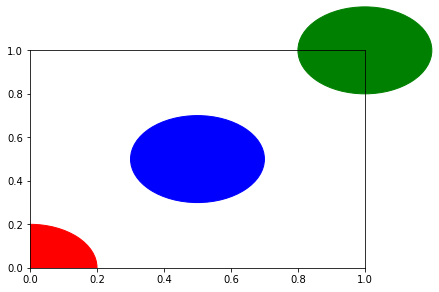

In [575]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 0.2, color='r')
circle2 = plt.Circle((0.5, 0.5), 0.2, color='blue')
circle3 = plt.Circle((1, 1), 0.2, color='g', clip_on=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

fig.savefig('plotcircles.png')

In [573]:
import shutil  
shutil.rmtree("/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/temp")
os.mkdir("/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/temp")
# os.rmdir('/Users/baichaoye/PycharmProjects/lab-declarative-Conformance-Checking/temp')